<a href="https://colab.research.google.com/github/GengerHein/human-ai-team-simulation/blob/main/01_clean_survey_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving survey.csv to survey.csv


In [2]:
import pandas as pd
df = pd.read_csv('survey.csv')
df.head()

,Timestamp,Background,What is your nationality?,Your current education level or recently finished one,I would accept an AI recommendation when making a group decision.,I trust AI systems to provide useful recommendations in policy or planning tasks.,I would follow an AI recommendation even if some teammates disagree.,I believe AI recommendations can help teams reach a common decision faster,"If most teammates disagreed with me, I would consider changing my opinion.",I often adjust my decisions after hearing majority views.,I prefer to stick with my original opinion even when others disagree.,"Have you ever used AI tools (e.g., ChatGPT, recommendation systems) during teamwork or study projects?"
0,29/10/2025 09:41:30,Engineering,Myanmar,Undergraduate,4,6,3,4,4,5,3,Yes
1,29/10/2025 09:43:09,Engineering,Myanmar,Undergraduate,5,4,3,4,6,6,3,Yes
2,29/10/2025 09:45:26,Medical Sciences,Myanmar,Post-Doctoral,5,5,4,5,4,5,3,Yes
3,29/10/2025 09:47:19,Engineering,Myanmar,Graduate (Master),5,4,4,6,7,6,3,Yes
4,29/10/2025 10:05:38,Education,Cambodian,Graduate (Master),3,4,4,3,5,6,3,No


In [3]:
df['Background'].value_counts()

,count
Background,
Engineering,19
Business and Management,8
Social Science,5
Computer Science,3
Architecture,2
Medical Sciences,1
Education,1
Design,1
Other,1


In [4]:
# Simplify background categories
df['Background'] = df['Background'].replace({
    'Business and Management': 'Business',
    'Medical Sciences': 'Other',
    'Dentistry': 'Other',
    'Dentist': 'Other',
    'Education': 'Other',
    'Design': 'Other',
    'Architecture': 'Other',
    'Engineering Science': 'Engineering',  # same cluster as Engineering
    'Other': 'Other'
})

# Show the new grouped counts
df['Background'].value_counts()


,count
Background,
Engineering,19
Business,8
Social Science,5
Computer Science,3
Other,2
Architecture,2
Education,1
Other,1
Dentistry,1


In [5]:
# Define background grouping
background_mapping = {
    'Engineering': 'Engineering',
    'Engineering Science': 'Engineering',
    'Business and Management': 'Business',
    'Medical Sciences': 'Other',
    'Dentistry': 'Other',
    'Dentist': 'Other',
    'Education': 'Other',
    'Design': 'Other',
    'Architecture': 'Other',
    'Social Science': 'Social Science',
    'Computer Science': 'Computer Science',
    'Other': 'Other'
}

# Apply mapping, defaulting to 'Other' if not found
df['Background'] = df['Background'].map(background_mapping).fillna('Other')

# Show cleaned counts
df['Background'].value_counts()


,count
Background,
Engineering,19
Other,17
Social Science,5
Computer Science,3


In [6]:
# Rename columns for clarity and shorter names
df = df.rename(columns={
    'I would accept an AI recommendation when making a group decision.': 'accept_ai',
    'I trust AI systems to provide useful recommendations in policy or planning tasks.': 'trust_ai',
    'I would follow an AI recommendation even if some teammates disagree.': 'ai_over_others',
    'I believe AI recommendations can help teams reach a common decision faster': 'ai_speed',
    'If most teammates disagreed with me, I would consider changing my opinion.': 'change_opinion_majority',
    'I often adjust my decisions after hearing majority views.': 'adjust_majority',
    'I prefer to stick with my original opinion even when others disagree.': 'stubborn',
})

df.head()


,Timestamp,Background,What is your nationality?,Your current education level or recently finished one,accept_ai,trust_ai,ai_over_others,ai_speed,change_opinion_majority,adjust_majority,stubborn,"Have you ever used AI tools (e.g., ChatGPT, recommendation systems) during teamwork or study projects?"
0,29/10/2025 09:41:30,Engineering,Myanmar,Undergraduate,4,6,3,4,4,5,3,Yes
1,29/10/2025 09:43:09,Engineering,Myanmar,Undergraduate,5,4,3,4,6,6,3,Yes
2,29/10/2025 09:45:26,Other,Myanmar,Post-Doctoral,5,5,4,5,4,5,3,Yes
3,29/10/2025 09:47:19,Engineering,Myanmar,Graduate (Master),5,4,4,6,7,6,3,Yes
4,29/10/2025 10:05:38,Other,Cambodian,Graduate (Master),3,4,4,3,5,6,3,No


In [7]:
# Compute averages per background group for trust and stubbornness
grouped_params = df.groupby('Background').agg({
    'trust_ai': 'mean',
    'stubborn': 'mean'
})

grouped_params = grouped_params.rename(columns={
    'trust_ai': 'avg_trust_in_ai',
    'stubborn': 'avg_stubbornness'
})

grouped_params


,avg_trust_in_ai,avg_stubbornness
Background,,
Computer Science,4.333333,2.333333
Engineering,4.368421,3.789474
Other,4.294118,3.823529
Social Science,4.200000,3.400000


In [8]:
# Create agent role definitions from survey data
agent_roles = grouped_params.to_dict('index')
agent_roles


{'Computer Science': {'avg_trust_in_ai': 4.333333333333333,
  'avg_stubbornness': 2.3333333333333335},
 'Engineering': {'avg_trust_in_ai': 4.368421052631579,
  'avg_stubbornness': 3.789473684210526},
 'Other': {'avg_trust_in_ai': 4.294117647058823,
  'avg_stubbornness': 3.823529411764706},
 'Social Science': {'avg_trust_in_ai': 4.2, 'avg_stubbornness': 3.4}}

In [9]:
import numpy as np
import pandas as pd

# Example simulation for a single team
np.random.seed(42)

# Step 1: Define team composition
team_roles = ['Engineering', 'Social Science', 'Computer Science', 'Other']
team_size = 4  # One of each role for now
team = []

# Initialize team agents with survey-based parameters
for role in team_roles:
    params = agent_roles[role]
    agent = {
        'role': role,
        'opinion': np.random.uniform(1, 10),  # initial opinion
        'trust_ai': params['avg_trust_in_ai'],
        'stubbornness': params['avg_stubbornness']
    }
    team.append(agent)

# Display initial team setup
pd.DataFrame(team)


,role,opinion,trust_ai,stubbornness
0,Engineering,4.370861,4.368421,3.789474
1,Social Science,9.556429,4.200000,3.400000
2,Computer Science,7.587945,4.333333,2.333333
3,Other,6.387926,4.294118,3.823529


In [10]:
# Step 2: Define simulation parameters
num_rounds = 10
ai_recommendation = 7  # AI suggests a strong support for the decision (e.g., from 1 to 10)

# Initialize log
logs = []

# Simulation loop
for round_num in range(1, num_rounds + 1):
    for agent in team:
        # Get average opinion of other team members
        other_opinions = [a['opinion'] for a in team if a['role'] != agent['role']]
        avg_other_opinion = np.mean(other_opinions)

        # Agent updates based on weighted mixture:
        # Trust in AI and influence from others, adjusted by stubbornness
        new_opinion = (
            agent['trust_ai'] / 7 * ai_recommendation +  # AI influence
            (1 - agent['stubbornness'] / 7) * avg_other_opinion +  # Peer influence
            agent['stubbornness'] / 7 * agent['opinion']  # Stubborn anchor
        )

        # Update agent opinion
        agent['opinion'] = new_opinion

    # Log opinions each round
    logs.append({
        'round': round_num,
        **{agent['role']: agent['opinion'] for agent in team}
    })

# Convert logs to DataFrame and display
log_df = pd.DataFrame(logs)
log_df


,round,Engineering,Social Science,Computer Science,Other
0,1,10.332271,13.008804,13.469093,13.351246
1,2,16.050998,17.867934,19.327515,19.640900
2,3,21.746950,23.287059,25.148040,25.638112
3,4,27.465682,28.925457,30.944736,31.508597
4,5,33.207252,34.648465,36.729204,37.324264
5,6,38.963871,40.403655,42.507910,43.116261
6,7,44.729056,46.170900,48.284018,48.898054
7,8,50.498766,51.942581,54.058984,54.675458
8,9,56.270756,57.715859,59.833455,60.450975
9,10,62.043862,63.489696,65.607715,66.225683


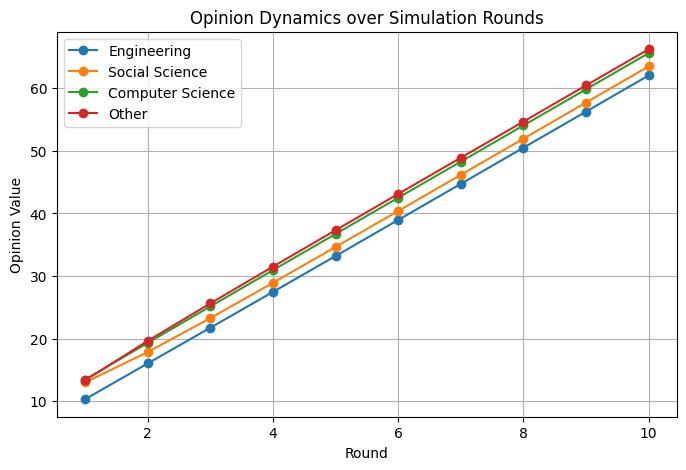

In [11]:
import matplotlib.pyplot as plt

# Plot opinions over time
plt.figure(figsize=(8, 5))

for role in team_roles:
    plt.plot(log_df['round'], log_df[role], marker='o', label=role)

plt.title('Opinion Dynamics over Simulation Rounds')
plt.xlabel('Round')
plt.ylabel('Opinion Value')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Step 2: Define refined simulation parameters
num_rounds = 10
ai_recommendation = 7

# Initialize log
logs = []

# Simulation loop (normalized influence factors)
for round_num in range(1, num_rounds + 1):
    for agent in team:
        # Calculate peer influence
        other_opinions = [a['opinion'] for a in team if a['role'] != agent['role']]
        avg_other_opinion = np.mean(other_opinions)

        # Normalize weights: trust in AI, inverse stubbornness, and stubbornness
        ai_weight = agent['trust_ai'] / 10
        peer_weight = (10 - agent['stubbornness']) / 10
        self_weight = agent['stubbornness'] / 10

        # Normalize total weight (just in case there’s drift)
        total_weight = ai_weight + peer_weight + self_weight
        ai_weight /= total_weight
        peer_weight /= total_weight
        self_weight /= total_weight

        # Updated opinion calculation
        new_opinion = ai_weight * ai_recommendation + peer_weight * avg_other_opinion + self_weight * agent['opinion']

        # Keep the opinion within 1–10
        agent['opinion'] = np.clip(new_opinion, 1, 10)

    # Log opinions each round
    logs.append({
        'round': round_num,
        **{agent['role']: agent['opinion'] for agent in team}
    })

# Convert logs to DataFrame and display
log_df = pd.DataFrame(logs)
log_df


,round,Engineering,Social Science,Computer Science,Other
0,1,10.000000,10.000000,10.000000,10.000000
1,2,9.087912,8.971367,8.747003,8.638765
2,3,8.322504,8.201468,8.026589,7.949750
3,4,7.806645,7.718842,7.608441,7.561404
4,5,7.484860,7.428480,7.361987,7.333859
5,6,7.289866,7.255310,7.215655,7.198889
6,7,7.172959,7.152152,7.128533,7.118540
7,8,7.103135,7.090689,7.076617,7.070661
8,9,7.061486,7.054058,7.045672,7.042121
9,10,7.036654,7.032224,7.027225,7.025109


In [16]:
def run_simulation(ai_mode='opaque'):
    # Copy team structure, reset opinions
    sim_team = []
    for role in team_roles:
        params = agent_roles[role]
        agent = {
            'role': role,
            'opinion': np.random.uniform(1, 10),
            'trust_ai': params['avg_trust_in_ai'] + (1 if ai_mode == 'xai' else 0),  # boost trust in XAI
            'stubbornness': params['avg_stubbornness']
        }
        sim_team.append(agent)

    logs = []
    for round_num in range(1, num_rounds + 1):
        for agent in sim_team:
            other_opinions = [a['opinion'] for a in sim_team if a['role'] != agent['role']]
            avg_other_opinion = np.mean(other_opinions)

            ai_weight = agent['trust_ai'] / 10
            peer_weight = (10 - agent['stubbornness']) / 10
            self_weight = agent['stubbornness'] / 10
            total_weight = ai_weight + peer_weight + self_weight

            ai_weight /= total_weight
            peer_weight /= total_weight
            self_weight /= total_weight

            # Updated based on AI mode
            new_opinion = ai_weight * ai_recommendation + peer_weight * avg_other_opinion + self_weight * agent['opinion']

            agent['opinion'] = np.clip(new_opinion, 1, 10)

        logs.append({
            'round': round_num,
            **{agent['role']: agent['opinion'] for agent in sim_team}
        })

    return pd.DataFrame(logs)

# Run both simulations
opaque_results = run_simulation('opaque')
xai_results = run_simulation('xai')
opaque_results, xai_results


(   round  Engineering  Social Science  Computer Science     Other
 0      1     5.299504        4.625779          5.390744  4.986903
 1      2     5.687542        5.666976          5.907429  5.923115
 2      3     6.149226        6.212902          6.338113  6.380703
 3      4     6.477626        6.532116          6.605276  6.634862
 4      5     6.685340        6.721496          6.764882  6.783029
 5      6     6.811750        6.834109          6.859899  6.870775
 6      7     6.887646        6.901146          6.916496  6.922986
 7      8     6.932998        6.941081          6.950224  6.954093
 8      9     6.960055        6.964880          6.970328  6.972635
 9     10     6.976187        6.979065          6.982312  6.983687,
    round  Engineering  Social Science  Computer Science     Other
 0      1     6.541320        8.075828          7.724906  7.499555
 1      2     7.196757        7.446348          7.300755  7.251947
 2      3     7.183091        7.206337          7.152663  7.1

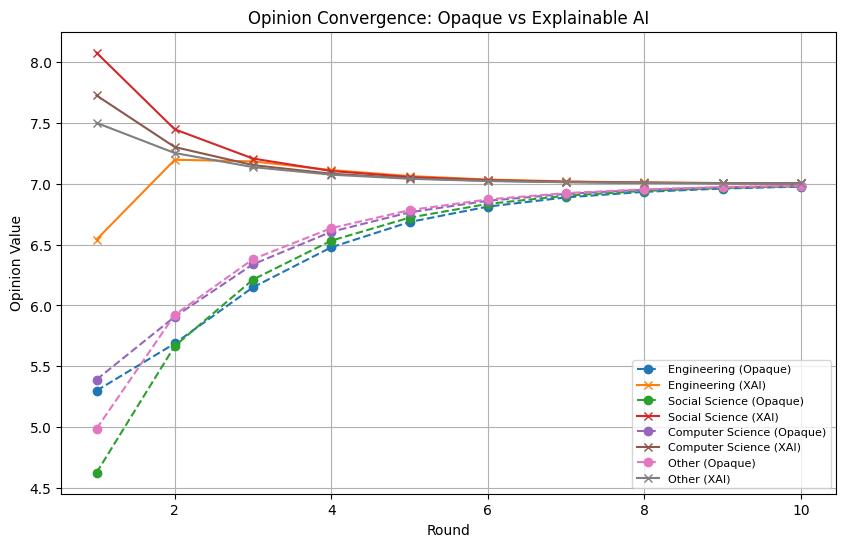

In [17]:
# Plot comparison of opaque vs explainable AI
plt.figure(figsize=(10, 6))

for role in team_roles:
    plt.plot(opaque_results['round'], opaque_results[role], linestyle='--', marker='o', label=f'{role} (Opaque)')
    plt.plot(xai_results['round'], xai_results[role], linestyle='-', marker='x', label=f'{role} (XAI)')

plt.title('Opinion Convergence: Opaque vs Explainable AI')
plt.xlabel('Round')
plt.ylabel('Opinion Value')
plt.legend(fontsize=8, loc='lower right')
plt.grid(True)
plt.show()
